In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('/Users/mandeebot/Desktop/ml_classification/wep-app/data_set/EasyVisa.csv')
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [20]:
from sklearn.preprocessing import LabelEncoder
#encoding categorical features to numerical ones
for e in data.columns:
    if data[e].dtype == 'object':
        c = LabelEncoder()
        c.fit(list(data[e].values))
        data[e] = c.transform(list(data[e].values))

In [21]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,4,0,3,1,0,1082,2005,3,149907.3900,3,1,0


In [22]:
y = data['case_status']
x = data.drop(columns=['case_status','case_id'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

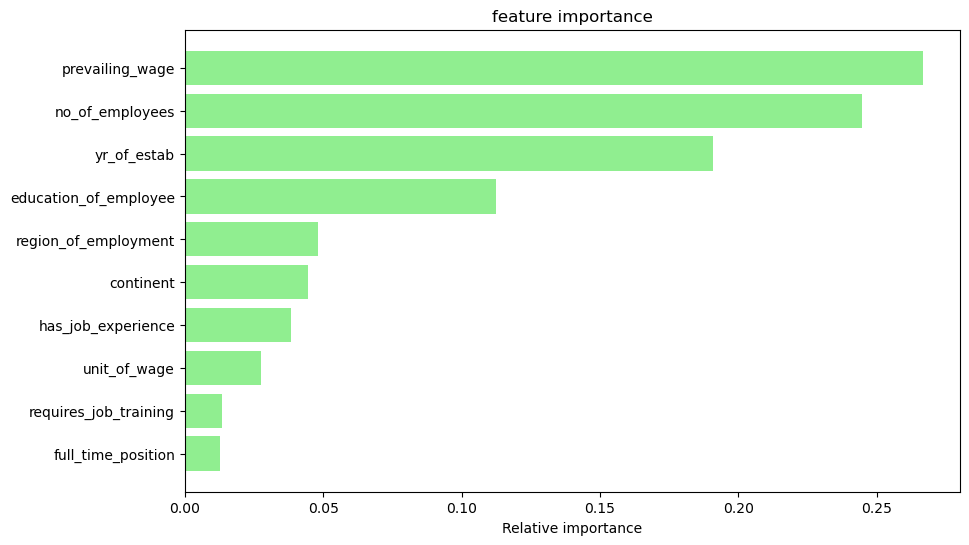

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x,y)

model = RandomForestClassifier()
model.fit(df_scaled,y)

feature_names = list(x.columns)
importance = model.feature_importances_
indices = np.argsort(importance)

#create the plot for the feature importances
plt.figure(figsize=(10,6))
plt.title("feature importance")
plt.barh(range(len(indices)),importance[indices], color = "lightgreen", align="center")
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative importance')
plt.show

In [25]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1) 

Base model

In [26]:
from sklearn.naive_bayes import GaussianNB

nv = GaussianNB()
nv.fit(X_train,y_train)

GaussianNB()

In [27]:
nv_pred = nv.predict(x_test)
nv_model_score = nv.score(x_test,y_test)
nv_model_score


0.6991104133961277

In [28]:
from sklearn.metrics import classification_report,accuracy_score
#naive bayes classififctaion report

print("Naive_bayes accuracy:", accuracy_score(y_test,nv_pred))
print("classification report \n:", classification_report(y_test,nv_pred))

Naive_bayes accuracy: 0.6991104133961277
classification report 
:               precision    recall  f1-score   support

           0       0.70      0.97      0.81      5182
           1       0.68      0.12      0.21      2462

    accuracy                           0.70      7644
   macro avg       0.69      0.55      0.51      7644
weighted avg       0.69      0.70      0.62      7644



MODEL 2, RANDOM FOREST MODEL

In [29]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
rf_pred = rf_model.predict(x_test)
rf_model_score = rf_model.score(x_test,y_test)
rf_model_score

0.7319466248037677

In [31]:
#model evaluation
print("Random Forest Model accuracy:", accuracy_score(y_test,rf_pred))
print("classification report \n:", classification_report(y_test,rf_pred))


Random Forest Model accuracy: 0.7319466248037677
classification report 
:               precision    recall  f1-score   support

           0       0.78      0.85      0.81      5182
           1       0.60      0.49      0.54      2462

    accuracy                           0.73      7644
   macro avg       0.69      0.67      0.68      7644
weighted avg       0.72      0.73      0.72      7644



SUPPORT VECTOR MACHINE MODEL

In [32]:
from sklearn import svm
sv_model = svm.SVC()
sv_model.fit(X_train,y_train)

SVC()

In [33]:
sv_pred = sv_model.predict(x_test)
sv_score = sv_model.score(x_test,y_test)
sv_score

0.6779173207744636

In [34]:
#model evaluation
print("Support Vector Model accuracy:", accuracy_score(y_test,sv_pred))
print("classification report \n:", classification_report(y_test,sv_pred))


Support Vector Model accuracy: 0.6779173207744636
classification report 
:               precision    recall  f1-score   support

           0       0.68      1.00      0.81      5182
           1       0.00      0.00      0.00      2462

    accuracy                           0.68      7644
   macro avg       0.34      0.50      0.40      7644
weighted avg       0.46      0.68      0.55      7644



/Users/mandeebot/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mandeebot/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mandeebot/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#productionize the model
import pickle

In [36]:
model_filename = "rf_model.pkl"

pickle.dump(rf_model, open(model_filename, 'wb'))